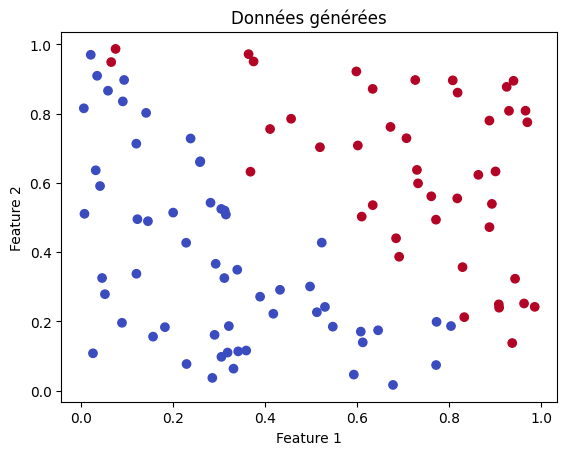

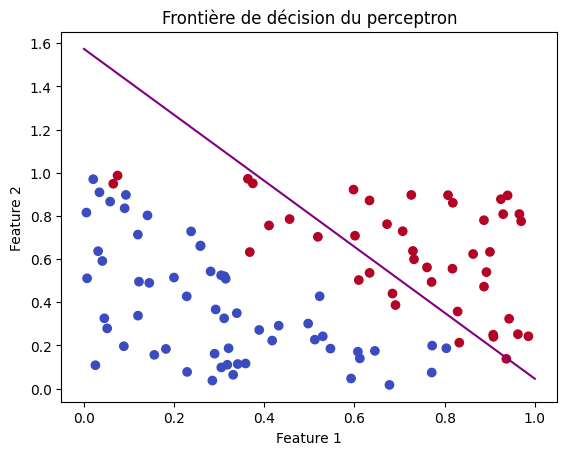

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Générer des données aléatoires pour deux classes
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Créer un DataFrame pandas
data = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

# Afficher les données
plt.scatter(data['feature1'], data['feature2'], c=data['target'], cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Données générées')
plt.show()

# Définir la fonction d'activation step
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron
class Perceptron:
    def __init__(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0

    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return step_function(linear_output)

    def train(self, X, y, epochs=10, learning_rate=0.1):
        for _ in range(epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                self.weights += learning_rate * (y[i] - prediction) * X[i]
                self.bias += learning_rate * (y[i] - prediction)

# Entraîner le perceptron
perceptron = Perceptron(num_features=2)
perceptron.train(X, y, epochs=10, learning_rate=0.1)

# Afficher la frontière de décision
x_values = np.linspace(0, 1, 100)
y_values = -(perceptron.weights[0] * x_values + perceptron.bias) / perceptron.weights[1]

plt.scatter(data['feature1'], data['feature2'], c=data['target'], cmap='coolwarm')
plt.plot(x_values, y_values, color='purple')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontière de décision du perceptron')
plt.show()